In [15]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context



train_MNIST = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test_MNIST = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

train_USPS = datasets.USPS('USPS', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test_USPS = datasets.USPS('USPS', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset_MNIST = torch.utils.data.DataLoader(train_MNIST, batch_size=32, shuffle=True)
testset_MNIST = torch.utils.data.DataLoader(test_MNIST, batch_size=32, shuffle=False)

trainset_USPS = torch.utils.data.DataLoader(train_USPS, batch_size=32, shuffle=True)
testset_USPS = torch.utils.data.DataLoader(test_USPS, batch_size=32, shuffle=False)



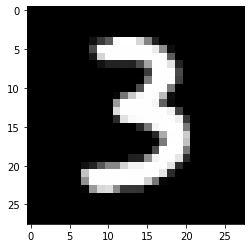

In [21]:
for data in trainset_MNIST:
    sample_from_MNIST = data
    break

plt.imshow(sample_from_MNIST[0][0].view(28,28), cmap="gray")
plt.show()

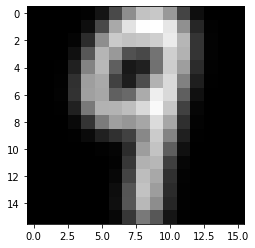

In [19]:
for data in trainset_USPS:
    sample_from_USPS = data
    break

plt.imshow(sample_from_USPS[0][0].view(16,16), cmap="gray")
plt.show()

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class fNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            # 1st conv layer
            # input [1 x 28 x 28]
            # output [64 x 12 x 12]
            nn.Conv2d(1, 64, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            # 2nd conv layer
            # input [64 x 12 x 12]
            # output [64 x 4 x 4]
            nn.Conv2d(64, 64, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            # 3rd conv layer
            # input [64 x 12 x 12]
            # output [128 x 4 x 4]
            nn.Conv2d(64, 128, kernel_size=5),
            nn.ReLU()
        )
        self.fc1 = nn.Linear(128 * 4 * 4, 10)
        

In [13]:
class gNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            # 1st conv layer
            # input [1 x 28 x 28]
            # output [64 x 12 x 12]
            nn.Conv2d(1, 64, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            # 2nd conv layer
            # input [64 x 12 x 12]
            # output [64 x 4 x 4]
            nn.Conv2d(64, 64, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            # 3rd conv layer
            # input [64 x 12 x 12]
            # output [128 x 4 x 4]
            nn.Conv2d(64, 128, kernel_size=5),
            nn.ReLU()
        )    
        self.fc1 = nn.Linear(128 * 4 * 4, 10)


In [23]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer = nn.Sequential(
            nn.Linear(input_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, output_dims),
            nn.LogSoftmax()
        )